<a href="https://colab.research.google.com/github/kundan9670/Vrinda-store-annul-report-data-analysis/blob/main/SUPERMART_GROCERY_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [ ]:
# Check for missing values
print(data.isnull().sum())
# Drop any rows with missing values
data.dropna(inplace=True)
# Check for duplicates
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])

# Check if 'Order Month' column exists before encoding
if 'Order Month' in data.columns:
    data['Order Month'] = le.fit_transform(data['Order Month'])
    # Display the first few rows after encoding
    print(data.head())
else:
    print("Error: 'Order Month' column not found. Please ensure the step to create 'Order Month' from 'Order Date' was executed successfully.")

Error: 'Order Month' column not found. Please ensure the step to create 'Order Month' from 'Order Date' was executed successfully.


/tmp/ipython-input-771904437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


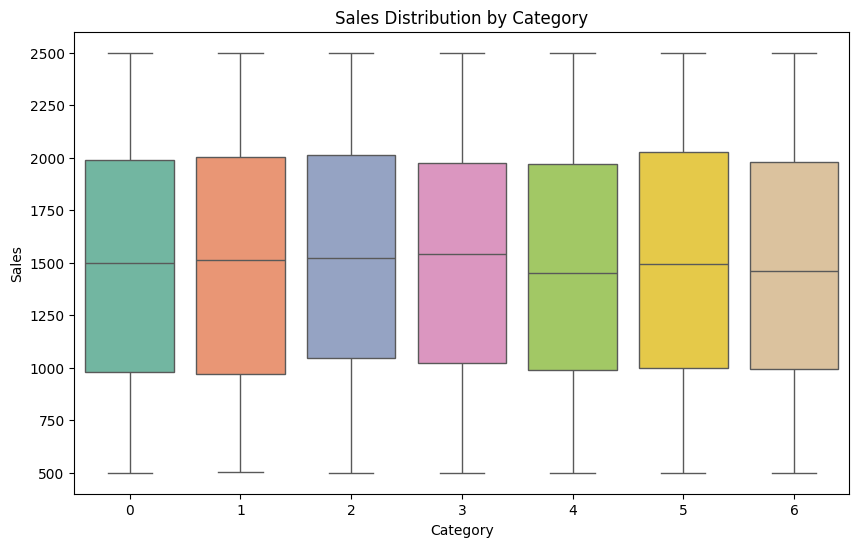

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

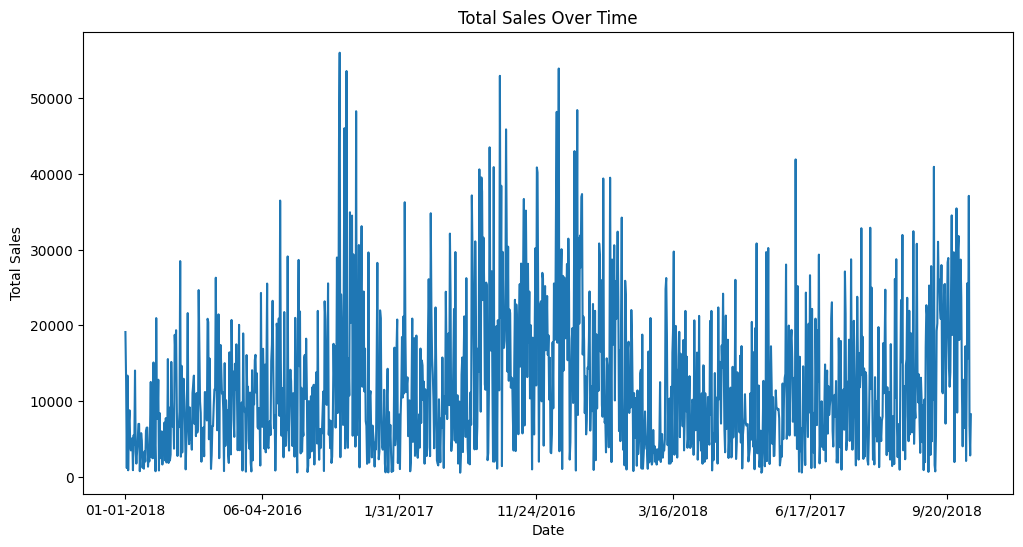

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

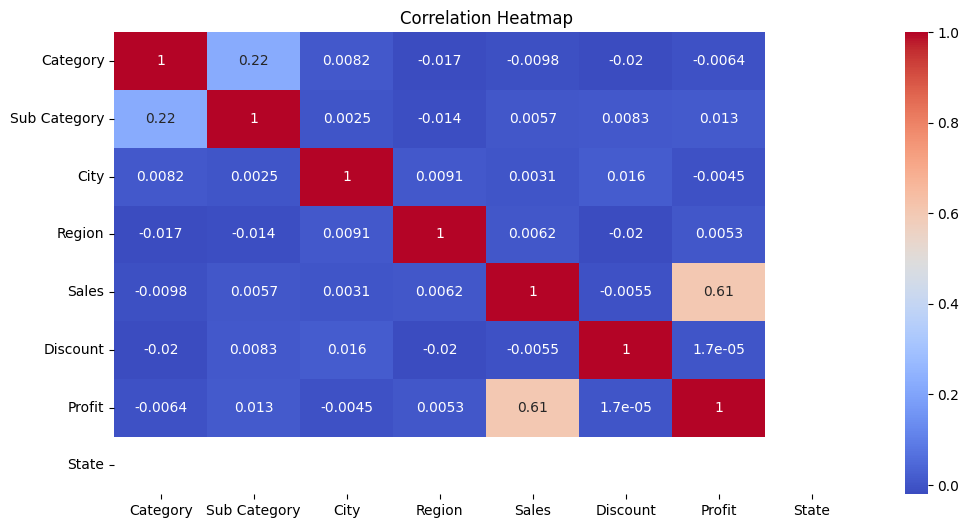

In [ ]:
plt.figure(figsize=(12, 6))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select features and target variable
columns_to_drop = ['Order ID', 'Customer Name', 'Order Date', 'Sales']
# Add 'Order Day' and 'Order Year' to columns to drop if they exist
if 'Order Day' in data.columns:
    columns_to_drop.append('Order Day')
else:
    print("Warning: 'Order Day' not found in DataFrame.")
if 'Order Year' in data.columns:
    columns_to_drop.append('Order Year')
else:
    print("Warning: 'Order Year' not found in DataFrame.")

features = data.drop(columns=columns_to_drop)
target = data['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212824.5973664153
R-squared: 0.3547183704729946


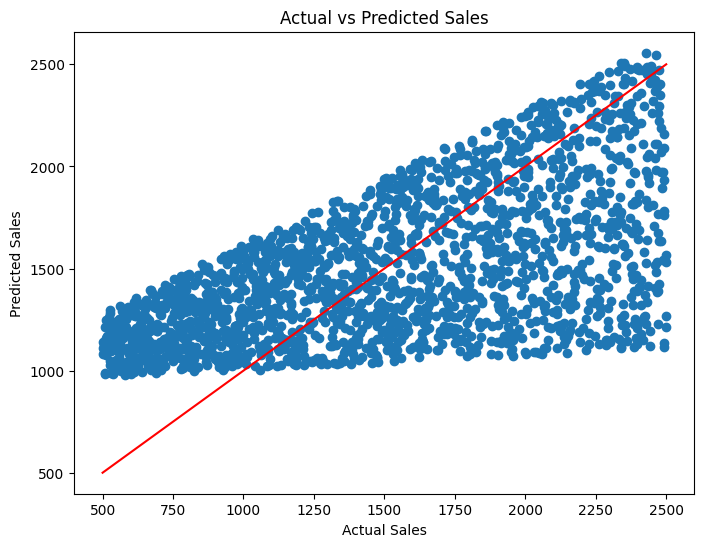

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()